In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. Carga de Data

In [3]:
df = pd.read_excel('D:/zDocumentosPersonales05_MBA/Transición laboral/CV-SergioAyesta/_Portafolio de Data Science/02_Algoritmo de CLV/Online Retail_1.xlsx', sheet_name='Online Retail')

In [4]:
df.shape

(538914, 8)

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# 2. Limpieza de Data

#### - Cantidades con signo negativo

In [6]:
df.loc[df['Quantity'] <= 0].shape

(10028, 8)

In [7]:
df.shape

(538914, 8)

In [8]:
df = df.loc[df['Quantity'] > 0]

In [9]:
df.shape

(528886, 8)

#### - Registros que no tienen CustomerID 

In [10]:
pd.isnull(df['CustomerID']).sum()

132516

In [11]:
df.shape

(528886, 8)

In [12]:
df = df[pd.notnull(df['CustomerID'])]

In [13]:
df.shape

(396370, 8)

In [14]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


#### - Excluir registros que corresponen al mes incompleto

In [15]:
print('Date Range: %s ~ %s' % (df['InvoiceDate'].min(), df['InvoiceDate'].max()))

Date Range: 2010-12-01 08:26:00 ~ 2011-12-09 12:50:00


In [16]:
df.loc[df['InvoiceDate'] >= '2011-12-01'].shape

(17242, 8)

In [17]:
df.shape

(396370, 8)

In [18]:
df = df.loc[df['InvoiceDate'] < '2011-12-01']

In [19]:
df.shape

(379128, 8)

#### - Total de Ventas

In [20]:
df['Sales'] = df['Quantity'] * df['UnitPrice']

In [21]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


#### - Data por Pedido

In [22]:
orders_df = df.groupby(['CustomerID', 'InvoiceNo']).agg({
    'Sales': sum,
    'InvoiceDate': max
})

In [23]:
orders_df

Sales         InvoiceDate
CustomerID InvoiceNo                              
12346.0    541431     77183.60 2011-01-18 10:01:00
12347.0    537626       711.79 2010-12-07 14:57:00
           542237       475.39 2011-01-26 14:30:00
           549222       636.25 2011-04-07 10:43:00
           556201       382.52 2011-06-09 13:01:00
...                        ...                 ...
18283.0    578262       313.65 2011-11-23 13:27:00
           579673       223.61 2011-11-30 12:59:00
18287.0    554065       765.28 2011-05-22 10:39:00
           570715      1001.32 2011-10-12 10:23:00
           573167        70.68 2011-10-28 09:29:00

[17629 rows x 2 columns]

# 3. Análisis de Datos

In [24]:
def groupby_mean(x):
    return x.mean()

def groupby_count(x):
    return x.count()

def purchase_duration(x):
    return (x.max() - x.min()).days

def avg_frequency(x):
    return (x.max() - x.min()).days/x.count()

groupby_mean.__name__ = 'avg'
groupby_count.__name__ = 'count'
purchase_duration.__name__ = 'purchase_duration'
avg_frequency.__name__ = 'purchase_frequency'

In [25]:
summary_df = orders_df.reset_index().groupby('CustomerID').agg({
    'Sales': [min, max, sum, groupby_mean, groupby_count],
    'InvoiceDate': [min, max, purchase_duration, avg_frequency]
})

In [26]:
summary_df

Sales                                          \
                 min       max       sum           avg count   
CustomerID                                                     
12346.0     77183.60  77183.60  77183.60  77183.600000     1   
12347.0       382.52   1294.32   4085.18    680.863333     6   
12348.0       187.44    652.80   1437.24    359.310000     4   
12349.0      1457.55   1457.55   1457.55   1457.550000     1   
12350.0       294.40    294.40    294.40    294.400000     1   
...              ...       ...       ...           ...   ...   
18280.0       180.60    180.60    180.60    180.600000     1   
18281.0        80.82     80.82     80.82     80.820000     1   
18282.0       100.21    100.21    100.21    100.210000     1   
18283.0         1.95    313.65   1880.93    125.395333    15   
18287.0        70.68   1001.32   1837.28    612.426667     3   

                   InvoiceDate                                        \
                           min                 max purchase_duration   
CustomerID                                                             
12346.0    2011-01-18 10:01:00 2011-01-18 10:01:00                 0   
12347.0    2010-12-07 14:57:00 2011-10-31 12:25:00               327   
12348.0    2010-12-16 19:09:00 2011-09-25 13:13:00               282   
12349.0    2011-11-21 09:51:00 2011-11-21 09:51:00                 0   
12350.0    2011-02-02 16:01:00 2011-02-02 16:01:00                 0   
...                        ...                 ...               ...   
18280.0    2011-03-07 09:52:00 2011-03-07 09:52:00                 0   
18281.0    2011-06-12 10:53:00 2011-06-12 10:53:00                 0   
18282.0    2011-08-05 13:35:00 2011-08-05 13:35:00                 0   
18283.0    2011-01-06 14:14:00 2011-11-30 12:59:00               327   
18287.0    2011-05-22 10:39:00 2011-10-28 09:29:00               158   

                               
           purchase_frequency  
CustomerID                     
12346.0              0.000000  
12347.0             54.500000  
12348.0             70.500000  
12349.0              0.000000  
12350.0              0.000000  
...                       ...  
18280.0              0.000000  
18281.0              0.000000  
18282.0              0.000000  
18283.0             21.800000  
18287.0             52.666667  

[4294 rows x 9 columns]

In [27]:
summary_df.columns = ['_'.join(col).lower() for col in summary_df.columns]

In [28]:
summary_df

,sales_min,sales_max,sales_sum,sales_avg,sales_count,invoicedate_min,invoicedate_max,invoicedate_purchase_duration,invoicedate_purchase_frequency
CustomerID,,,,,,,,,
12346.0,77183.60,77183.60,77183.60,77183.600000,1,2011-01-18 10:01:00,2011-01-18 10:01:00,0,0.000000
12347.0,382.52,1294.32,4085.18,680.863333,6,2010-12-07 14:57:00,2011-10-31 12:25:00,327,54.500000
12348.0,187.44,652.80,1437.24,359.310000,4,2010-12-16 19:09:00,2011-09-25 13:13:00,282,70.500000
12349.0,1457.55,1457.55,1457.55,1457.550000,1,2011-11-21 09:51:00,2011-11-21 09:51:00,0,0.000000
12350.0,294.40,294.40,294.40,294.400000,1,2011-02-02 16:01:00,2011-02-02 16:01:00,0,0.000000
...,...,...,...,...,...,...,...,...,...
18280.0,180.60,180.60,180.60,180.600000,1,2011-03-07 09:52:00,2011-03-07 09:52:00,0,0.000000
18281.0,80.82,80.82,80.82,80.820000,1,2011-06-12 10:53:00,2011-06-12 10:53:00,0,0.000000
18282.0,100.21,100.21,100.21,100.210000,1,2011-08-05 13:35:00,2011-08-05 13:35:00,0,0.000000


In [29]:
summary_df.shape

(4294, 9)

In [30]:
summary_df = summary_df.loc[summary_df['invoicedate_purchase_duration'] > 0]

In [31]:
summary_df.shape

(2678, 9)

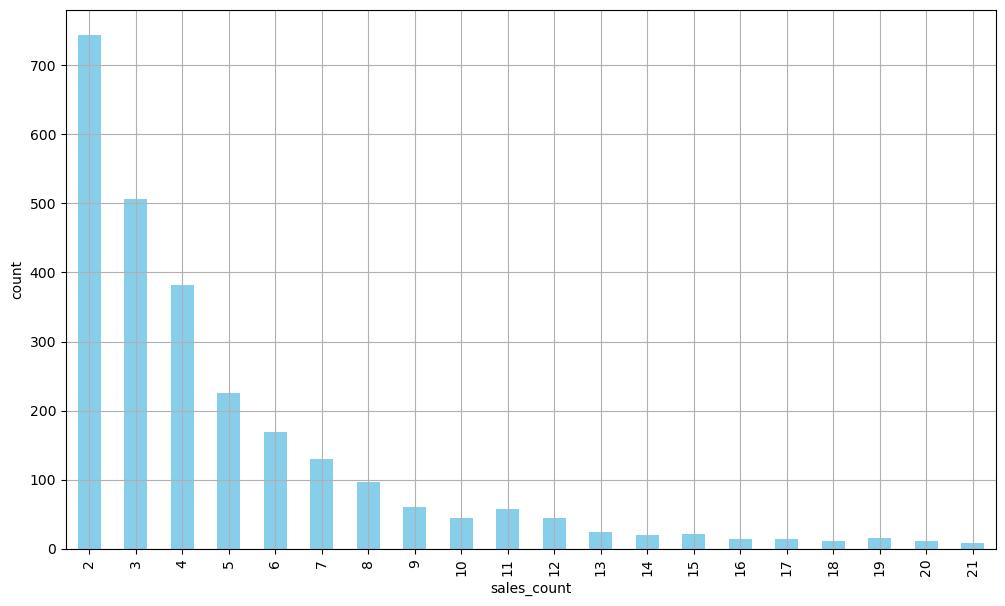

In [32]:
ax = summary_df.groupby('sales_count').count()['sales_avg'][:20].plot(
    kind='bar', 
    color='skyblue',
    figsize=(12,7), 
    grid=True
)

ax.set_ylabel('count')

plt.show()

In [33]:
summary_df['sales_count'].describe()

count    2678.000000
mean        5.951830
std         8.806278
min         2.000000
25%         2.000000
50%         4.000000
75%         6.000000
max       197.000000
Name: sales_count, dtype: float64

In [34]:
summary_df['sales_avg'].describe()

count     2678.000000
mean       386.451672
std        457.834758
min          9.140000
25%        195.950000
50%        303.324167
75%        441.384375
max      14844.766667
Name: sales_avg, dtype: float64

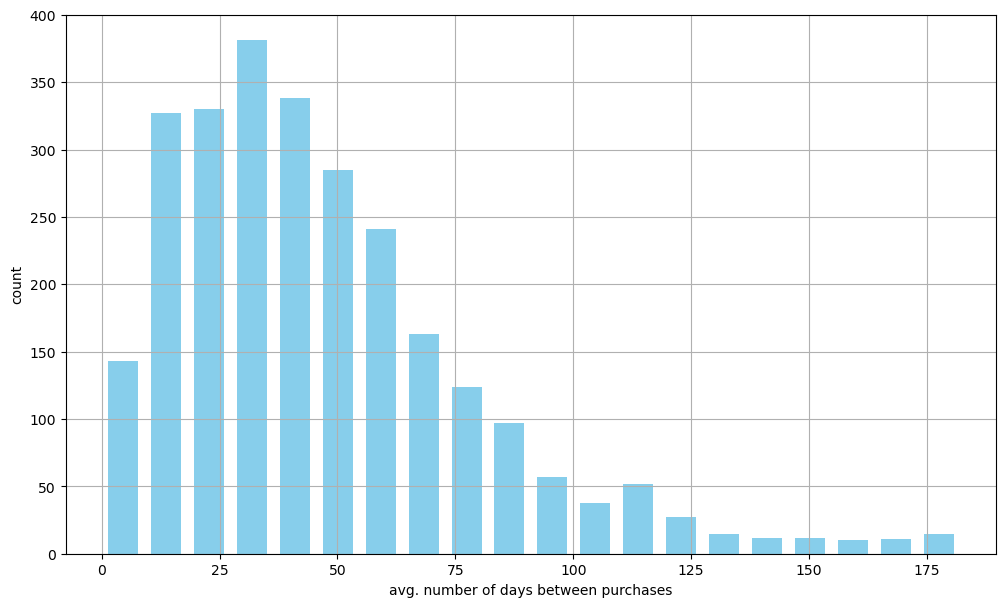

In [35]:
ax = summary_df['invoicedate_purchase_frequency'].hist(
    bins=20,
    color='skyblue',
    rwidth=0.7,
    figsize=(12,7)
)

ax.set_xlabel('avg. number of days between purchases')
ax.set_ylabel('count')

plt.show()

In [36]:
summary_df['invoicedate_purchase_frequency'].describe()

count    2678.000000
mean       47.243980
std        32.353940
min         0.029412
25%        24.000000
50%        40.750000
75%        62.500000
max       182.000000
Name: invoicedate_purchase_frequency, dtype: float64

In [37]:
summary_df['invoicedate_purchase_duration'].describe()

count    2678.000000
mean      200.300597
std       107.545598
min         1.000000
25%       108.250000
50%       210.000000
75%       296.000000
max       364.000000
Name: invoicedate_purchase_duration, dtype: float64

# 4. Predicción de Customer Lifetime Value (CLV) de 3 meses

## 4.1. Preparación de Datos

In [38]:
clv_freq = '3M'

In [39]:
data_df = orders_df.reset_index().groupby([
    'CustomerID',
    pd.Grouper(key='InvoiceDate', freq=clv_freq)
]).agg({
    'Sales': [sum, groupby_mean, groupby_count],
})

In [40]:
data_df.columns = ['_'.join(col).lower() for col in data_df.columns]

In [41]:
data_df = data_df.reset_index()

In [42]:
data_df.head(10)

,CustomerID,InvoiceDate,sales_sum,sales_avg,sales_count
0,12346.0,2011-03-31,77183.60,77183.600,1
1,12347.0,2010-12-31,711.79,711.790,1
2,12347.0,2011-03-31,475.39,475.390,1
3,12347.0,2011-06-30,1018.77,509.385,2
4,12347.0,2011-09-30,584.91,584.910,1
5,12347.0,2011-12-31,1294.32,1294.320,1
6,12348.0,2010-12-31,652.80,652.800,1
7,12348.0,2011-03-31,187.44,187.440,1
8,12348.0,2011-06-30,327.00,327.000,1
9,12348.0,2011-09-30,270.00,270.000,1


In [43]:
date_month_map = {
    str(x)[:10]: 'M_%s' % (i+1) for i, x in enumerate(
        sorted(data_df.reset_index()['InvoiceDate'].unique(), reverse=True)
    )
}

In [44]:
data_df['M'] = data_df['InvoiceDate'].apply(lambda x: date_month_map[str(x)[:10]])

In [45]:
date_month_map

{'2011-12-31': 'M_1',
 '2011-09-30': 'M_2',
 '2011-06-30': 'M_3',
 '2011-03-31': 'M_4',
 '2010-12-31': 'M_5'}

In [46]:
data_df.head(10)

,CustomerID,InvoiceDate,sales_sum,sales_avg,sales_count,M
0,12346.0,2011-03-31,77183.60,77183.600,1,M_4
1,12347.0,2010-12-31,711.79,711.790,1,M_5
2,12347.0,2011-03-31,475.39,475.390,1,M_4
3,12347.0,2011-06-30,1018.77,509.385,2,M_3
4,12347.0,2011-09-30,584.91,584.910,1,M_2
5,12347.0,2011-12-31,1294.32,1294.320,1,M_1
6,12348.0,2010-12-31,652.80,652.800,1,M_5
7,12348.0,2011-03-31,187.44,187.440,1,M_4
8,12348.0,2011-06-30,327.00,327.000,1,M_3
9,12348.0,2011-09-30,270.00,270.000,1,M_2


#### - Construcción de los datos muestrales

In [47]:
features_df = pd.pivot_table(
    data_df.loc[data_df['M'] != 'M_1'], 
    values=['sales_sum', 'sales_avg', 'sales_count'], 
    columns='M', 
    index='CustomerID'
)

In [48]:
features_df.columns = ['_'.join(col) for col in features_df.columns]

In [49]:
features_df.shape

(3613, 12)

In [50]:
features_df.head(10)

,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5
CustomerID,,,,,,,,,,,,
12346.0,NaN,NaN,77183.6000,NaN,NaN,NaN,1.0,NaN,NaN,NaN,77183.60,NaN
12347.0,584.91,509.385,475.3900,711.79,1.0,2.0,1.0,1.0,584.91,1018.77,475.39,711.79
12348.0,270.00,327.000,187.4400,652.80,1.0,1.0,1.0,1.0,270.00,327.00,187.44,652.80
12350.0,NaN,NaN,294.4000,NaN,NaN,NaN,1.0,NaN,NaN,NaN,294.40,NaN
12352.0,256.25,NaN,160.3775,NaN,2.0,NaN,4.0,NaN,512.50,NaN,641.51,NaN
12353.0,NaN,89.000,NaN,NaN,NaN,1.0,NaN,NaN,NaN,89.00,NaN,NaN
12354.0,NaN,1079.400,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1079.40,NaN,NaN
12355.0,NaN,459.400,NaN,NaN,NaN,1.0,NaN,NaN,NaN,459.40,NaN,NaN
12356.0,NaN,481.460,1947.6200,NaN,NaN,1.0,1.0,NaN,NaN,481.46,1947.62,NaN


In [51]:
features_df = features_df.fillna(0)

In [52]:
features_df.head()

,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5
CustomerID,,,,,,,,,,,,
12346.0,0.00,0.000,77183.6000,0.00,0.0,0.0,1.0,0.0,0.00,0.00,77183.60,0.00
12347.0,584.91,509.385,475.3900,711.79,1.0,2.0,1.0,1.0,584.91,1018.77,475.39,711.79
12348.0,270.00,327.000,187.4400,652.80,1.0,1.0,1.0,1.0,270.00,327.00,187.44,652.80
12350.0,0.00,0.000,294.4000,0.00,0.0,0.0,1.0,0.0,0.00,0.00,294.40,0.00
12352.0,256.25,0.000,160.3775,0.00,2.0,0.0,4.0,0.0,512.50,0.00,641.51,0.00


In [53]:
response_df = data_df.loc[
    data_df['M'] == 'M_1',
    ['CustomerID', 'sales_sum']
]

In [54]:
response_df.columns = ['CustomerID', 'CLV_' + clv_freq]

In [55]:
response_df.shape

(2406, 2)

In [56]:
response_df.head(10)

,CustomerID,CLV_3M
5,12347.0,1294.32
10,12349.0,1457.55
14,12352.0,231.73
20,12356.0,58.35
21,12357.0,6207.67
25,12359.0,2876.85
28,12360.0,923.78
33,12362.0,1909.85
37,12364.0,269.06
41,12370.0,739.28


In [57]:
sample_set_df = features_df.merge(
    response_df, 
    left_index=True, 
    right_on='CustomerID',
    how='left'
)

In [58]:
sample_set_df.shape

(3613, 14)

In [59]:
sample_set_df.head(10)

,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5,CustomerID,CLV_3M
NaN,0.00,0.000,77183.6000,0.00,0.0,0.0,1.0,0.0,0.00,0.00,77183.60,0.00,12346.0,NaN
5.0,584.91,509.385,475.3900,711.79,1.0,2.0,1.0,1.0,584.91,1018.77,475.39,711.79,12347.0,1294.32
NaN,270.00,327.000,187.4400,652.80,1.0,1.0,1.0,1.0,270.00,327.00,187.44,652.80,12348.0,NaN
NaN,0.00,0.000,294.4000,0.00,0.0,0.0,1.0,0.0,0.00,0.00,294.40,0.00,12350.0,NaN
14.0,256.25,0.000,160.3775,0.00,2.0,0.0,4.0,0.0,512.50,0.00,641.51,0.00,12352.0,231.73
NaN,0.00,89.000,0.0000,0.00,0.0,1.0,0.0,0.0,0.00,89.00,0.00,0.00,12353.0,NaN
NaN,0.00,1079.400,0.0000,0.00,0.0,1.0,0.0,0.0,0.00,1079.40,0.00,0.00,12354.0,NaN
NaN,0.00,459.400,0.0000,0.00,0.0,1.0,0.0,0.0,0.00,459.40,0.00,0.00,12355.0,NaN
20.0,0.00,481.460,1947.6200,0.00,0.0,1.0,1.0,0.0,0.00,481.46,1947.62,0.00,12356.0,58.35
NaN,404.86,0.000,0.0000,0.00,1.0,0.0,0.0,0.0,404.86,0.00,0.00,0.00,12358.0,NaN


In [60]:
sample_set_df = sample_set_df.fillna(0)

In [61]:
sample_set_df.head()

,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5,CustomerID,CLV_3M
NaN,0.00,0.000,77183.6000,0.00,0.0,0.0,1.0,0.0,0.00,0.00,77183.60,0.00,12346.0,0.00
5.0,584.91,509.385,475.3900,711.79,1.0,2.0,1.0,1.0,584.91,1018.77,475.39,711.79,12347.0,1294.32
NaN,270.00,327.000,187.4400,652.80,1.0,1.0,1.0,1.0,270.00,327.00,187.44,652.80,12348.0,0.00
NaN,0.00,0.000,294.4000,0.00,0.0,0.0,1.0,0.0,0.00,0.00,294.40,0.00,12350.0,0.00
14.0,256.25,0.000,160.3775,0.00,2.0,0.0,4.0,0.0,512.50,0.00,641.51,0.00,12352.0,231.73


In [62]:
sample_set_df['CLV_'+clv_freq].describe()

count     3613.000000
mean       500.898118
std       2310.231918
min          0.000000
25%          0.000000
50%          0.000000
75%        453.550000
max      68012.350000
Name: CLV_3M, dtype: float64

## 4.2. Modelos de Regresión

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
target_var = 'CLV_' + clv_freq
all_features = [x for x in sample_set_df.columns if x not in ['CustomerID', target_var]]

In [65]:
x_train, x_test, y_train, y_test = train_test_split(
    sample_set_df[all_features], 
    sample_set_df[target_var], 
    test_size=0.3
)

#### - Modelo de Regresión Lineal

In [66]:
from sklearn.linear_model import LinearRegression

# Tratar con estos modelos también puede dar buenos resultados
# from sklearn.svm import SVR
# from sklearn.ensemble import RandomForestRegressor

In [67]:
reg_fit = LinearRegression()

In [68]:
reg_fit.fit(x_train, y_train)

LinearRegression()

In [69]:
reg_fit.intercept_

-93.66334311930751

In [70]:
coef = pd.DataFrame(list(zip(all_features, reg_fit.coef_)))
coef.columns = ['feature', 'coef']

coef

,feature,coef
0,sales_avg_M_2,0.292682
1,sales_avg_M_3,-0.002800
2,sales_avg_M_4,0.248654
3,sales_avg_M_5,-1.154572
4,sales_count_M_2,98.172959
5,sales_count_M_3,-23.930488
6,sales_count_M_4,57.153027
7,sales_count_M_5,-60.593441
8,sales_sum_M_2,0.216757
9,sales_sum_M_3,0.495430


## 4.3. Evaluación del modelo

In [71]:
from sklearn.metrics import r2_score, median_absolute_error

In [72]:
train_preds =  reg_fit.predict(x_train)
test_preds = reg_fit.predict(x_test)

#### - R-cuadrado

In [73]:
print('En la Muestra R-Cuadrado: %0.4f' % r2_score(y_true = y_train, y_pred = train_preds))
print('Fuera de la Muestra R-Cuadrado: %0.4f' % r2_score(y_true = y_test, y_pred = test_preds))

En la Muestra R-Cuadrado: 0.8341
Fuera de la Muestra R-Cuadrado: 0.4931


#### - Error absoluto mediano - Median Absolute Error (MAE)

In [74]:
print('En la Muestra MSE: %0.4f' % median_absolute_error(y_true=y_train, y_pred=train_preds))
print('Fuera de la Muestra MSE: %0.4f' % median_absolute_error(y_true=y_test, y_pred=test_preds))

En la Muestra MSE: 177.6756
Fuera de la Muestra MSE: 189.6483


#### - Scatter Plot

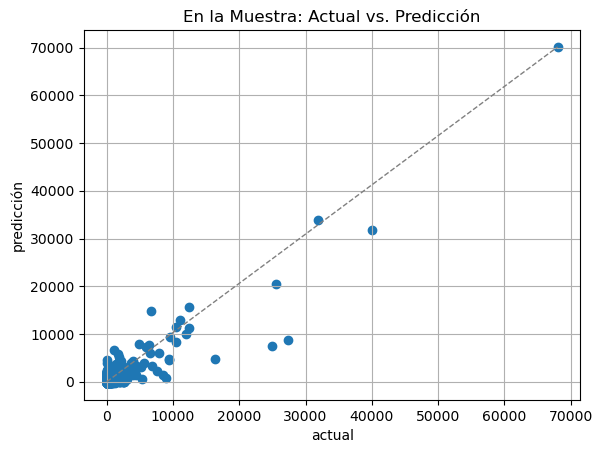

In [75]:
plt.scatter(y_train, train_preds)
plt.plot([0, max(y_train)], [0, max(train_preds)], color='gray', lw=1, linestyle='--')

plt.xlabel('actual')
plt.ylabel('predicción')
plt.title('En la Muestra: Actual vs. Predicción')
plt.grid()

plt.show()

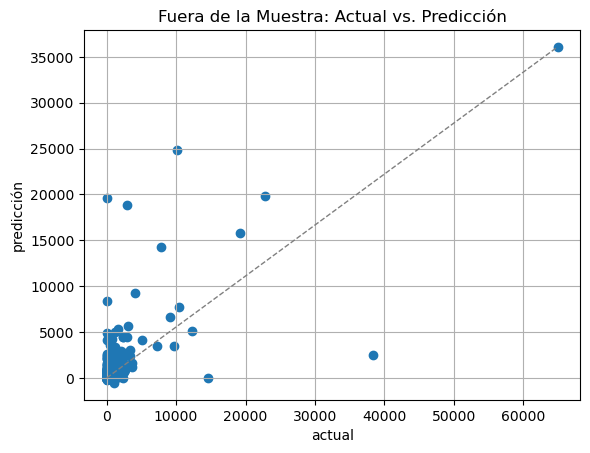

In [76]:
plt.scatter(y_test, test_preds)
plt.plot([0, max(y_test)], [0, max(test_preds)], color='gray', lw=1, linestyle='--')

plt.xlabel('actual')
plt.ylabel('predicción')
plt.title('Fuera de la Muestra: Actual vs. Predicción')
plt.grid()

plt.show()